# NYC Taxi data in Winter and Summer

Refer to the [Data dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) to learn more about the columns that have been provided.


In [ ]:
#Install the pandas library
!pip install pandas

In [1]:
import pandas as pd

path = '../../data/taxi.csv'

#Load the csv file into a dataframe
df = pd.read_csv(path)

#Print the head of the dataframe
print(df.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2019-07-15 16:27:53   2019-07-15 16:44:21              3.0   
1       2.0  2019-07-17 20:26:35   2019-07-17 20:40:09              6.0   
2       2.0  2019-07-06 16:01:08   2019-07-06 16:10:25              1.0   
3       1.0  2019-07-18 22:32:23   2019-07-18 22:35:08              1.0   
4       2.0  2019-07-19 14:54:29   2019-07-19 15:19:08              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.02         1.0                  N           186           233   
1           1.59         1.0                  N           141           161   
2           1.69         1.0                  N           246           249   
3           0.90         1.0                  N           229           141   
4           4.79         1.0                  N           237           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [3]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000
mean,1.605000,1.560000,3.72935,1.055000,162.26000,169.080000,1.285000,15.402500,0.790000,0.497500,2.013900,0.465700,3.000000e-01,20.154350,1.125000
std,0.519929,1.222239,4.71901,0.335466,64.62985,67.869618,0.452547,15.172931,1.048282,0.035355,2.292065,1.672997,5.565045e-17,17.072769,1.246855
min,1.000000,0.000000,0.16000,1.000000,4.00000,13.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,4.300000,0.000000
25%,1.000000,1.000000,1.12750,1.000000,132.00000,131.250000,1.000000,7.000000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,10.215000,0.000000
50%,2.000000,1.000000,1.88000,1.000000,161.00000,164.000000,1.000000,9.500000,0.500000,0.500000,1.650000,0.000000,3.000000e-01,14.120000,0.000000
75%,2.000000,2.000000,3.82000,1.000000,230.25000,236.000000,2.000000,17.000000,1.000000,0.500000,2.712500,0.000000,3.000000e-01,22.552500,2.500000
max,4.000000,6.000000,22.00000,5.000000,264.00000,265.000000,2.000000,120.000000,4.500000,0.500000,14.640000,10.700000,3.000000e-01,125.300000,2.500000


In [23]:
# Check for NaNs or nulls in the DataFrame
na_columns = df.isna().any()

# Display columns with NaNs
print("Columns with NaNs or nulls:")
print(na_columns[na_columns == True])

# Display rows with NaNs or nulls
nan_rows = df[df.isna().any(axis=1)]
print("Rows with NaNs or nulls:")
print(nan_rows)

Columns with NaNs or nulls:
Series([], dtype: bool)
Rows with NaNs or nulls:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge]
Index: []


# Do yellow taxi passengers in New York City tip drivers more in the winter or summer?

In the data set, we have columns that offer a lot of data that we can play and generate insights with. However, the most important columns are the tip_amount and pick_up date time since these column directly answer the main question that we have.

Here, we will just use the tpep_pickup_datetime column because as we all know, the average duration of a taxi trip doesnt last for days, let alone having a taxi trip that started in winter and ended in summer. This basic assumption will give us more time on the analysis and less time in making things harder for us.

In [24]:
from datetime import datetime
#Let's convert the tpep_pickup_datetime to a datetime object
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%Y-%m-%d %H:%M:%S")
df.dtypes


VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime            object
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

<Axes: xlabel='tpep_pickup_datetime'>

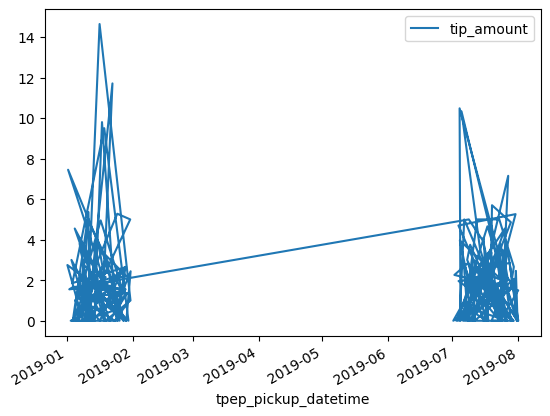

In [28]:
import matplotlib.pyplot as plt
df.plot(x = "tpep_pickup_datetime", y = "tip_amount")

The plot above doesn't seem to be very helpful. How about we try to groupby the pick_up date, aggregate the mean of the tip_amount and see if there is a trend in the tip amount?

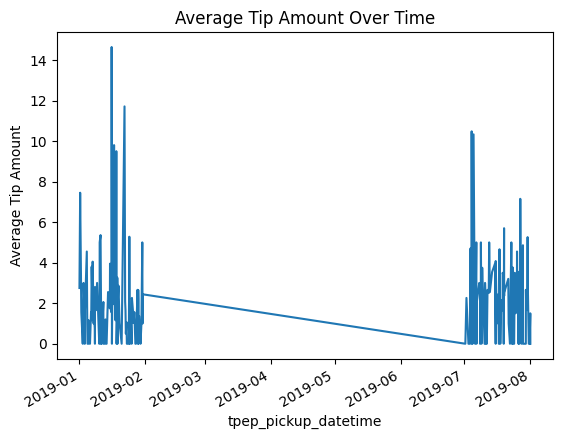

In [36]:
grouped_df = df[["tpep_pickup_datetime", 'tip_amount']].groupby("tpep_pickup_datetime").mean()

# Plot the results
grouped_df.plot(y='tip_amount', legend=False)
plt.xlabel("tpep_pickup_datetime")
plt.ylabel("Average Tip Amount")
plt.title("Average Tip Amount Over Time")
plt.show()

In [25]:
max_date = max(df["tpep_pickup_datetime"])
min_date = min(df["tpep_pickup_datetime"])

print(f"start date:{min_date}\nend date:{max_date}")

start date:2019-01-01 04:11:08
end date:2019-07-31 23:10:37


## Creating another column that tells us if the pick up date is in the winter or summer
Since we know that the start date and the end date for the data set is  both in the year 2019, started in the 1st of January and ended in the 31st of July.

### The Summer of 2019 in New York City
Fri, Jun 21, 2019 – Mon, Sep 23, 2019.
However, we only have the date set for until July 31, 2019. We'll use that
### The Winter of 2019 in New York City
The Winter of 2019 in New York City, is on December 19, 2019 - March 20, 2020. However, that is outside the date range of our dataframe. Hence, we will use the Winter of 2018 date in New York City, which is from December 19, 2018 to March 19, 2019.

In [37]:
#let's create another column, named Season that checks if falls under summer or winter
df["Season"] = df["tpep_pickup_datetime"].dt.month.apply(lambda x: "Winter" if x in [12, 1, 2] else "Summer")
df["Season"]

0      Summer
1      Summer
2      Summer
3      Summer
4      Summer
        ...  
195    Winter
196    Winter
197    Winter
198    Winter
199    Winter
Name: Season, Length: 200, dtype: object

Text(0.5, 1.0, 'Average Tip Amount Over Time')

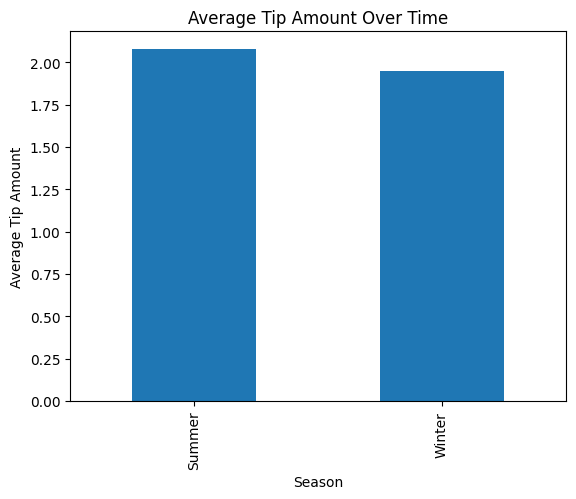

In [42]:
#let's try to plot them
grouped_df = df[["Season", 'tip_amount']].groupby("Season").mean()

# Plot the results
grouped_df.plot(y='tip_amount', kind = "bar", legend = False)
plt.xlabel("Season")
plt.ylabel("Average Tip Amount")
plt.title("Average Tip Amount Over Time")

 Let's look at the individual distribution of the tip amount for Summer and Winter

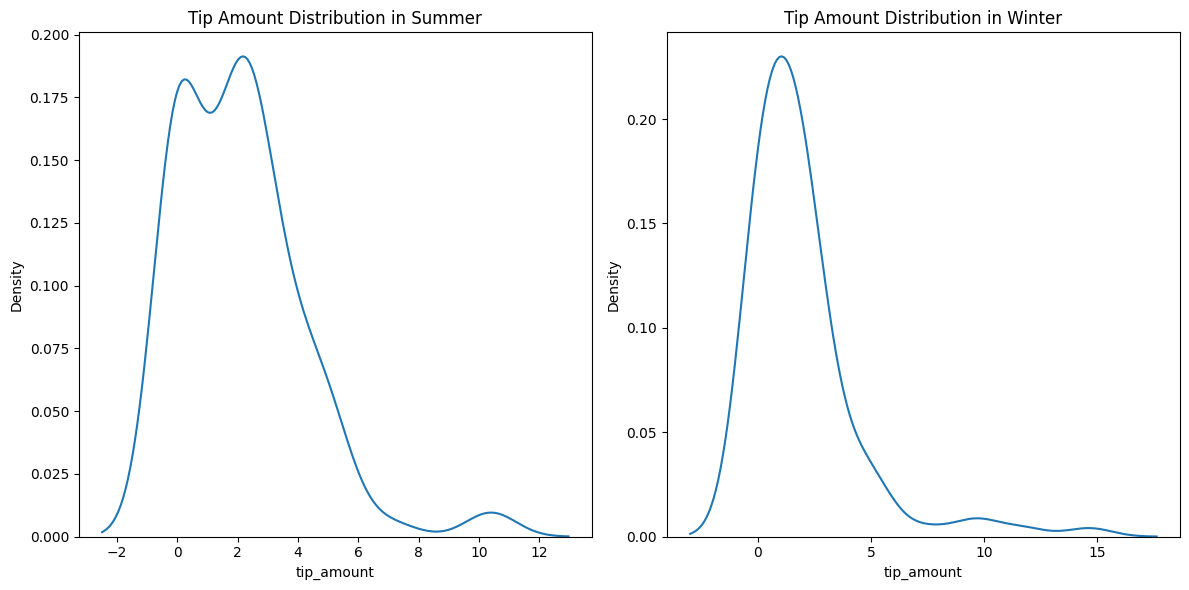

In [64]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# KDE plot for Summer season
sns.kdeplot(data=df[df["Season"] == "Summer"], x="tip_amount", ax=axs[0])
axs[0].set_title("Tip Amount Distribution in Summer")

# KDE plot for Winter season
sns.kdeplot(data=df[df["Season"] == "Winter"], x="tip_amount", ax=axs[1])
axs[1].set_title("Tip Amount Distribution in Winter")

plt.tight_layout()
plt.show()

Hold on, a negative tip amount? That's new, how can there be a negative tip amount? That is because of how kernel density estimate works. Because there are a lot of tips around 0, so it approximates the density in that part. Let's check the histplot for the seasons

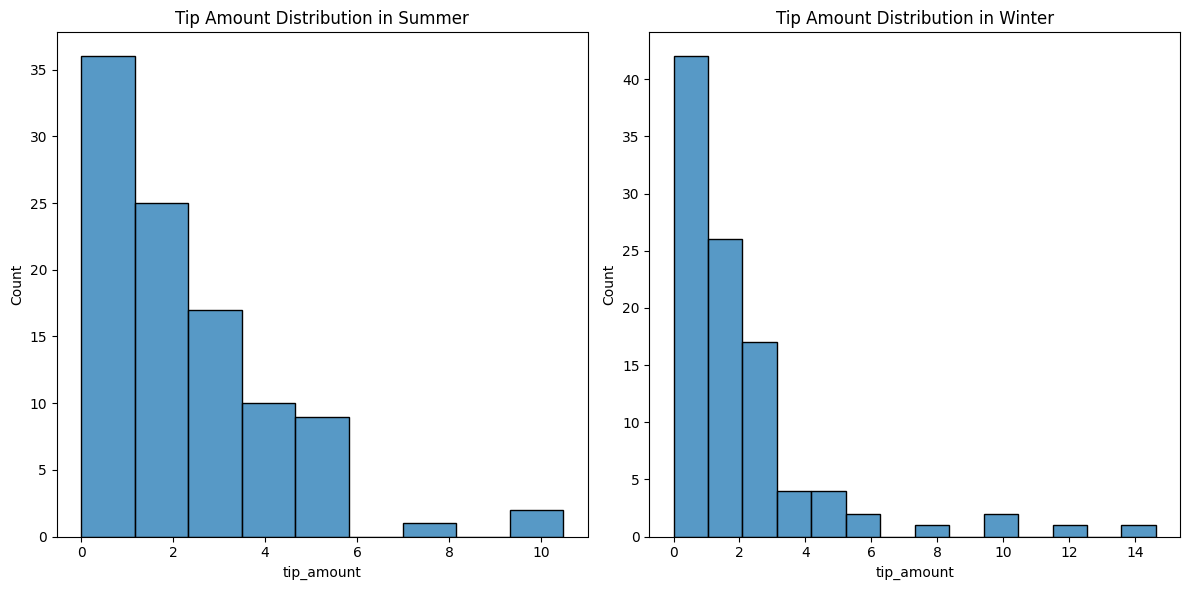

In [65]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# KDE plot for Summer season
sns.histplot(data=df[df["Season"] == "Summer"], x="tip_amount", ax=axs[0])
axs[0].set_title("Tip Amount Distribution in Summer")

# KDE plot for Winter season
sns.histplot(data=df[df["Season"] == "Winter"], x="tip_amount", ax=axs[1])
axs[1].set_title("Tip Amount Distribution in Winter")

plt.tight_layout()
plt.show()

As we can see, there are no negative tip amount values

In [68]:
# Let's check the descriptive statistic of each season in question
summer_mean = df[df["Season"] == "Summer"]['tip_amount'].mean()
summer_mode = df[df["Season"] == "Summer"]["tip_amount"].value_counts().index[0]
summer_median = df[df["Season"] == "Summer"]["tip_amount"].median()
summer_count = (df[df["Season"] == "Summer"]["tip_amount"]).count()
#For winter
winter_mean = df[df["Season"] == "Winter"]['tip_amount'].mean()
winter_mode = df[df["Season"] == "Winter"]["tip_amount"].value_counts().index[0]
winter_median = df[df["Season"] =="Winter"]["tip_amount"].median()
winter_count = (df[df["Season"] == "Winter"]["tip_amount"]).count()
print(f"Summer Descriptive Statistic:  \nMean: {summer_mean}\nMode: {summer_mode}\nMedian: {summer_median}\nSample Count: {summer_count}\nWinter Descriptive Statistic:\nMean: {winter_mean}\nMode: {winter_mode}\nMedian: {winter_median}\nSample Count: {winter_count}")

Summer Descriptive Statistic:  
Mean: 2.0784
Mode: 0.0
Median: 2.0
Sample Count: 100
Winter Descriptive Statistic:
Mean: 1.9494
Mode: 0.0
Median: 1.48
Sample Count: 100


We can see that the Mean in Summer season is slightly greater than the mean in Winter Season desoute Winter Season having the higher range, as seen in the tip amount distribution. As we take a closer look in the histogram plot for Winter, there are a lot of no tips compared to the summer season. There are also larger counts around 3 to 6 dollars tip in the Summer season compared to the winter season.

## Using T-test for two independent
A t-test for two independent samples is used to determine whether there is a statistically significant difference between the means of two independent groups. Here are some key reasons and scenarios for using this test:

**Comparing Two Groups**: When you want to compare the means of two different groups, such as comparing the tip amounts between the "Summer" and "Winter" seasons in your dataset.

**Hypothesis Testing**: It helps in hypothesis testing where you have a null hypothesis stating that there is no difference between the two group means, and an alternative hypothesis stating that there is a difference.

**Independence of Samples**: The test is appropriate when the two samples are independent, meaning that the observations in one sample do not influence the observations in the other sample. For example, tip amounts given in the summer by different customers are independent of those given in the winter.

**Normality and Variance Assumptions**: The t-test assumes that the data is approximately normally distributed and that the variances of the two groups are equal (though there is a version of the test that adjusts for unequal variances, known as Welch's t-test).

**Simple and Effective**: It is a simple yet powerful test for comparing means when you have small to moderately sized samples.

Here, we'll use the Welch's test to determine if there is really a significant difference between the tip amounts in the Summer and Winter seasons. We also have equal samples for each season.

In [67]:
import scipy.stats as stats

# Extract tip amounts for Summer and Winter
tip_summer = df[df["Season"] == "Summer"]["tip_amount"]
tip_winter = df[df["Season"] == "Winter"]["tip_amount"]

# Perform t-test
t_stat, p_value = stats.ttest_ind(tip_summer, tip_winter, equal_var=False)  # Use equal_var=False for Welch's t-test
alpha = 0.05  # Set the significance level
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the tip amounts in Summer and Winter.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the tip amounts in Summer and Winter.")


T-statistic: 0.39712452044285573
P-value: 0.691716248380744
Fail to reject the null hypothesis: There is no significant difference between the tip amounts in Summer and Winter.


### Interpretation:

**Fail to Reject the Null Hypothesis**: When the p-value is greater than αα, it indicates that any observed difference in the sample means could be due to random chance rather than a true difference in the population means.

**Conclusion**: We do not have enough evidence to say that there is a significant difference between the two groups. Hence, there is no evidence to suggest that yellow taxi passengers in New York City tip drivers more in the winter or summer.